In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [38]:
##EQUATIONS OF MOTION##
x = lambda A, omega, t: A*np.cos(omega*t)
v = lambda A, omega, t: -A*omega*np.sin(omega*t)
a = lambda A, omega, t: -A*omega**2*np.cos(omega*t)
j = lambda A, omega, t: A*omega**3*np.sin(omega*t)

##ENERGY EQUATIONS##
U = lambda k, x: 0.5*k*x**2
K = lambda m, v: 0.5*m*v**2
E = lambda A, k: 0.5*k*A**2

##TIME DEPENDENT ENERGY EQUATIONS##
A_t = lambda y_max, m, b, t: y_max*np.exp(-(b*t)/(2*m))
U_t = lambda k, A, omega, t: 0.5*k*x(A, omega, t)**2
K_t = lambda m, A, omega, t: 0.5*m*v(A, omega, t)**2

In [39]:
# period = 30 #seconds
# k = 160  #Spring constant
# m = 1 #Mass of bob
# b = .05  #Damping constant
# t_damped = 2*m/b  #Timed constant
# A = 2  #max amplitude

# w_o = 2*np.pi/period  #Original omega
# w = np.sqrt(k/m)*np.pi/180   #Angular frequency sqrt(k/m) -> converted to radians
# w_d = lambda k, m, b: np.sqrt((k/m) - ((b**2)/(4*m**2)))  #Damped angular frequency

In [40]:
# #Position
# pos = [x(A, w, t) for t in time] #x values
# pos_damped = [x(A_t(A, w_d, t), w, t) for t in time]

# #Velocity
# vel = [v(A, 2*np.pi/period, t) for t in time] #velocity values

# #Acceleration
# acc = [a(A, 2*np.pi/period, t) for t in time] #acceleration values

# #Damped Envelope
# env = [A_t(A,w_d,t) for t in time]
# env_2 = [-A_t(A,w_d,t) for t in time]

<IPython.core.display.Javascript object>


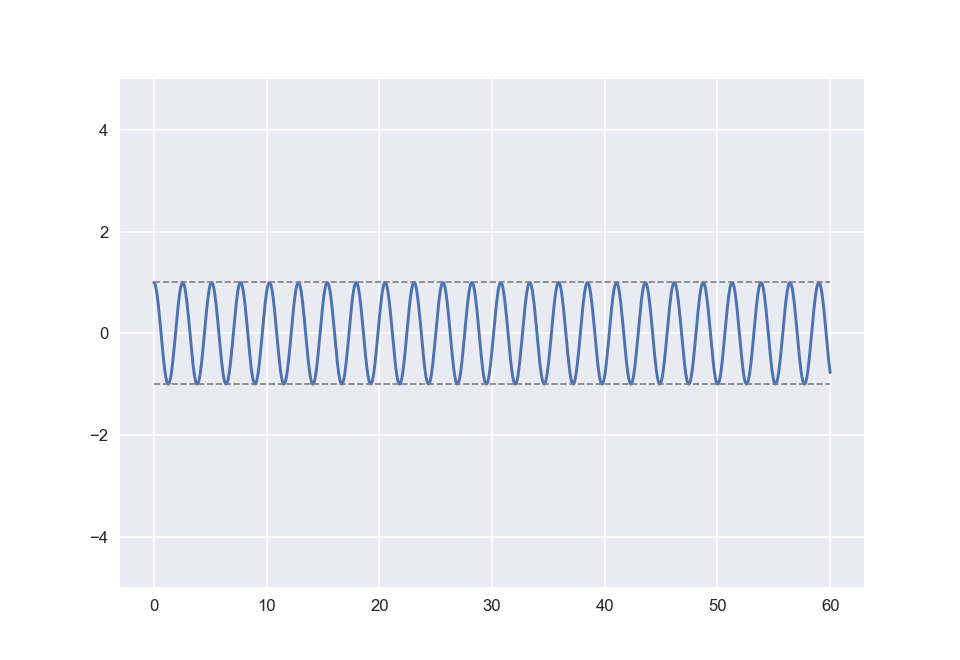

interactive(children=(FloatSlider(value=5.0, description='A', max=10.0, step=0.5), IntSlider(value=25, descrip…

<function __main__.update(A=(0, 10, 0.5), k=(0, 50, 1), m=(0.05, 3, 0.05), b=(0, 3, 0.05))>

In [55]:
time = np.linspace(0, 60, 1000) #1000 time intervals between 0 and 60 sec

fig, ax = plt.subplots()
line, = ax.plot(time, np.zeros_like(time))
line2, = ax.plot(time, np.zeros_like(time), '--', color='grey', linewidth=1)
line3, = ax.plot(time, np.zeros_like(time), '--', color='grey', linewidth=1)
ax.set_ylim(-5, 5)

def update(A=(0,10,.5), k=(0,50, 1), m=(0.05,3,0.05), b=(0,3,0.05)):
    
    line.set_ydata([A_t(A, m, b, t)*np.cos(w_d(k, m, b)*t) for t in time])
    line2.set_ydata([A_t(A, m, b, t) for t in time])
    line3.set_ydata([-A_t(A, m, b, t) for t in time])
    fig.canvas.draw_idle()
    
    
widgets.interact(update)

In [ ]:
# plt.plot(time, pos_damped)
plt.plot(time, env, '--', linewidth=1, color='black')
plt.plot(time, env_2, '--', linewidth=1, color='black')
plt.plot(time, np.zeros_like(time), linewidth=1, color='black')